In [1]:
# 모듈 로딩 --------------------------------------------------------
import tensorflow as tf
from tensorflow.keras import Sequential              # 모델 객체
from tensorflow.keras.layers import Dense           # 레이어 객체
from tensorflow.keras.datasets.boston_housing import load_data
import numpy as np

### [1] 데이터 로딩

In [2]:
# 학습용, 테스트용 = 8 : 2
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [4]:
X_train[:1], y_train[0]

(array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
          91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
          18.72   ]]),
 15.2)

#### [1-1] 전처리
---
- 특성(Feature) 전처리
    * 수치 데이터 : 값의 범위
    * 문자 데이터 : 수치화

### [2] NN Nodel 실습
---
    * (1) 모델 구성
    * (2) 모델 생성
    * (3) 학습
    * (4) 평가
    * (5) 테스트

#### [2-1] 모델 구상
- 입력 데이터 => 13개 Features
- 출력 데이터 => 1개 집값
- 학습   방법 => 회귀 or 분류
    - 13개 Features
 * Dense Layer : node=1, af=linear, input_shape=(13, )

In [5]:
# NN Model의 Layer를 층층이 담아서 관리하는 객체
model=Sequential(name='Boston')

In [6]:
# Layer 추가하기
# model.add(Dense(1, activation='linear', input_shape(13, )))

In [32]:
# Layer 추가하기
l1=Dense(30, activation='relu', input_shape=(13,))
l2=Dense(10, activation='relu', name='hidden-2')
# 회귀 => 출력층
l3=Dense(1, activation='linear', name='output')

In [33]:
model.add(l1)
model.add(l2)
model.add(l3)

In [9]:
# 모델 구성 확인   => summary()
model.summary()

Model: "Boston"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### [2-2] 모델 생성
---
-Sequential 클래스의 compile 메서드
- 모델이 동작하기 위해서 필요한 설정
    * 오차 계산 함수 설정 => loss
    * W, B 최적화 방식 설정 => optimizer
    * 모델의 성능 측정 항목 설정 => metrics
---
- 오차/로스 계산함수
    * 회귀 -> mae, mse, rmse
    * 분류 -> crossentropy 
       => 이진분류 : binary_crossentropy
          다중분류 : categorical_crossentropy  <= 타겟 One Hot 했을때
                  sparse_categorical_crossentropy <= One Hot Encoding X
---
- 파라미터 값들
    * str 타입으로 입력 가능
    * 객체 타입으로 입력 가능
---    
- 최적화 optimizer param
    * 기본 : rmsprop
    * adam, momonent, ... 최적화 클래스 이름 문자열 입력
---    
- 성능 평가 metrics param
    * 기본 : loss
    * 클래스 이름 문자열 입력

In [10]:
model.compile(loss='mse', optimizer='adam', metrics='mae')

#### [2-3] 학습
---
- fit()메서드
    * 파라미터
    * 반환값 => History 객체

- epochs=1         : 처음~끝까지 학습 횟수
- batch_size=32    : 학습량 크기
- validation_split : 학습 데이터의 일부를 검증용으로 분리 0.0~1.0
- validation_data  : (테스트데이터, 테스트 타겟)
- callback         : 학습 시 발생하는 이벤트 처리 함수 등록

- History 반환값
    * 형태 : dict 형태
    * 기본 : 학습 데이터에 대한 loss 값 저장
---
- 반환값
    *loss,metrics

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

# 검증 데이터에 대한 loss값 3번 연속 개선되지 않으면 학습 중지
stopCB = EarlyStopping(monitor='val_loss, patience=3')

In [22]:
result=model.fit(X_train, y_train, 
                 epochs=1000, 
                 batch_size=10,
                validation_data=(X_test, y_test),
                callbacks=[stopCB])

Epoch 1/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4300 - mae: 3.5360 - val_loss: 25.1305 - val_mae: 3.6018
Epoch 2/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1611 - mae: 3.5412 - val_loss: 25.8476 - val_mae: 3.6609
Epoch 3/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1692 - mae: 3.5207 - val_loss: 25.7040 - val_mae: 3.6752
Epoch 4/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5655 - mae: 3.5452 - val_loss: 25.8915 - val_mae: 3.6617
Epoch 5/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2696 - mae: 3.5178 - val_loss: 25.7211 - val_mae: 3.6493
Epoch 6/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2850 - mae: 3.5002 - val_loss: 26.5296 - val_mae: 3.7392
Epoch 7/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.1318 - mae: 3.5653 - val_loss: 25.4686 - val_mae: 3.6264
Epoch 8/1000
41/41 [==============================] - 0s 2ms/s

41/41 [==============================] - 0s 2ms/step - loss: 26.0841 - mae: 3.5945 - val_loss: 27.0041 - val_mae: 3.7843
Epoch 24/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4350 - mae: 3.4703 - val_loss: 26.4272 - val_mae: 3.7439
Epoch 25/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.6174 - mae: 3.5572 - val_loss: 25.6402 - val_mae: 3.6737
Epoch 26/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2986 - mae: 3.5360 - val_loss: 26.7680 - val_mae: 3.7707
Epoch 27/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3781 - mae: 3.5132 - val_loss: 25.5178 - val_mae: 3.6415
Epoch 28/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5862 - mae: 3.5471 - val_loss: 25.7202 - val_mae: 3.6405
Epoch 29/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6549 - mae: 3.5119 - val_loss: 25.2340 - val_mae: 3.6061
Epoch 30/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 25.6414 - mae: 3.5029 - val_loss: 25.1345 - val_mae: 3.6037
Epoch 47/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5265 - mae: 3.4662 - val_loss: 25.6507 - val_mae: 3.6762
Epoch 48/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.8946 - mae: 3.5612 - val_loss: 25.1892 - val_mae: 3.6125
Epoch 49/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9689 - mae: 3.5044 - val_loss: 26.2051 - val_mae: 3.7221
Epoch 50/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.9070 - mae: 3.6552 - val_loss: 26.7397 - val_mae: 3.7784
Epoch 51/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.2633 - mae: 3.6029 - val_loss: 25.8069 - val_mae: 3.6901
Epoch 52/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3495 - mae: 3.5674 - val_loss: 27.8986 - val_mae: 3.8868
Epoch 53/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 27.7797 - mae: 3.8613 - val_loss: 25.6036 - val_mae: 3.6631
Epoch 69/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.8467 - mae: 3.4925 - val_loss: 25.0040 - val_mae: 3.5965
Epoch 70/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2611 - mae: 3.4892 - val_loss: 25.7950 - val_mae: 3.6896
Epoch 71/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3457 - mae: 3.5396 - val_loss: 26.2233 - val_mae: 3.7261
Epoch 72/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.1132 - mae: 3.5840 - val_loss: 25.2203 - val_mae: 3.6387
Epoch 73/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9902 - mae: 3.4511 - val_loss: 25.7380 - val_mae: 3.6828
Epoch 74/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6009 - mae: 3.5232 - val_loss: 25.7649 - val_mae: 3.6759
Epoch 75/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 25.1998 - mae: 3.5645 - val_loss: 25.3147 - val_mae: 3.6070
Epoch 92/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4195 - mae: 3.5254 - val_loss: 25.3370 - val_mae: 3.6202
Epoch 93/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6762 - mae: 3.5170 - val_loss: 28.4893 - val_mae: 3.9512
Epoch 94/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.6621 - mae: 3.6414 - val_loss: 25.3886 - val_mae: 3.6324
Epoch 95/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1786 - mae: 3.4672 - val_loss: 25.1758 - val_mae: 3.6004
Epoch 96/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4718 - mae: 3.4558 - val_loss: 27.0058 - val_mae: 3.8060
Epoch 97/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.9071 - mae: 3.6413 - val_loss: 26.8513 - val_mae: 3.7846
Epoch 98/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 27.6211 - mae: 3.7584 - val_loss: 25.1045 - val_mae: 3.6123
Epoch 114/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5166 - mae: 3.5082 - val_loss: 25.4481 - val_mae: 3.6547
Epoch 115/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9880 - mae: 3.4703 - val_loss: 26.3306 - val_mae: 3.7370
Epoch 116/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2562 - mae: 3.5059 - val_loss: 25.9655 - val_mae: 3.6929
Epoch 117/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1791 - mae: 3.5254 - val_loss: 25.6624 - val_mae: 3.6381
Epoch 118/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.2424 - mae: 3.4510 - val_loss: 25.1169 - val_mae: 3.5946
Epoch 119/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9892 - mae: 3.4598 - val_loss: 25.3683 - val_mae: 3.6403
Epoch 120/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.0617 - mae: 3.5039 - val_loss: 27.3789 - val_mae: 3.8458
Epoch 137/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7162 - mae: 3.5092 - val_loss: 25.0362 - val_mae: 3.6081
Epoch 138/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.2426 - mae: 3.5000 - val_loss: 27.6590 - val_mae: 3.8752
Epoch 139/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.4849 - mae: 3.7115 - val_loss: 24.9799 - val_mae: 3.6200
Epoch 140/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3947 - mae: 3.4746 - val_loss: 25.5500 - val_mae: 3.6557
Epoch 141/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6344 - mae: 3.5506 - val_loss: 24.6476 - val_mae: 3.5641
Epoch 142/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.0726 - mae: 3.5098 - val_loss: 25.2061 - val_mae: 3.6404
Epoch 143/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.6315 - mae: 3.5623 - val_loss: 25.9478 - val_mae: 3.7110
Epoch 159/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2636 - mae: 3.4517 - val_loss: 26.6782 - val_mae: 3.7833
Epoch 160/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0925 - mae: 3.4394 - val_loss: 25.1589 - val_mae: 3.6374
Epoch 161/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0442 - mae: 3.3929 - val_loss: 24.6878 - val_mae: 3.5908
Epoch 162/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9372 - mae: 3.3994 - val_loss: 25.5474 - val_mae: 3.6711
Epoch 163/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7684 - mae: 3.5643 - val_loss: 24.8723 - val_mae: 3.5783
Epoch 164/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9390 - mae: 3.4348 - val_loss: 24.8294 - val_mae: 3.6107
Epoch 165/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.4585 - mae: 3.6338 - val_loss: 27.4373 - val_mae: 3.8598
Epoch 182/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.6664 - mae: 3.5654 - val_loss: 25.1369 - val_mae: 3.6308
Epoch 183/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3536 - mae: 3.5391 - val_loss: 25.1634 - val_mae: 3.6380
Epoch 184/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2847 - mae: 3.4509 - val_loss: 24.7539 - val_mae: 3.6020
Epoch 185/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7998 - mae: 3.4904 - val_loss: 24.7134 - val_mae: 3.5684
Epoch 186/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6482 - mae: 3.5337 - val_loss: 24.6682 - val_mae: 3.5672
Epoch 187/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.1817 - mae: 3.4437 - val_loss: 25.4357 - val_mae: 3.6543
Epoch 188/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.0386 - mae: 3.4401 - val_loss: 24.8750 - val_mae: 3.6172
Epoch 204/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9730 - mae: 3.3918 - val_loss: 25.1232 - val_mae: 3.6331
Epoch 205/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0029 - mae: 3.4955 - val_loss: 24.9044 - val_mae: 3.6094
Epoch 206/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.8875 - mae: 3.6633 - val_loss: 24.6852 - val_mae: 3.5764
Epoch 207/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2347 - mae: 3.4568 - val_loss: 24.5414 - val_mae: 3.5689
Epoch 208/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.0227 - mae: 3.5739 - val_loss: 25.2604 - val_mae: 3.6493
Epoch 209/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7696 - mae: 3.5232 - val_loss: 24.1987 - val_mae: 3.5431
Epoch 210/1000
41/41 [==============================] - 0s 1ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.2733 - mae: 3.4800 - val_loss: 26.7864 - val_mae: 3.7945
Epoch 227/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3529 - mae: 3.4708 - val_loss: 24.5426 - val_mae: 3.5560
Epoch 228/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9902 - mae: 3.4374 - val_loss: 24.5394 - val_mae: 3.5675
Epoch 229/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0650 - mae: 3.4658 - val_loss: 25.2807 - val_mae: 3.6527
Epoch 230/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0695 - mae: 3.4219 - val_loss: 24.6690 - val_mae: 3.5724
Epoch 231/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3603 - mae: 3.4465 - val_loss: 24.8934 - val_mae: 3.6186
Epoch 232/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2245 - mae: 3.4984 - val_loss: 24.4281 - val_mae: 3.5591
Epoch 233/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 1ms/step - loss: 24.8106 - mae: 3.4733 - val_loss: 25.7279 - val_mae: 3.6853
Epoch 249/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4643 - mae: 3.4439 - val_loss: 27.1734 - val_mae: 3.8418
Epoch 250/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6143 - mae: 3.5103 - val_loss: 24.2806 - val_mae: 3.5459
Epoch 251/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2104 - mae: 3.5022 - val_loss: 24.6244 - val_mae: 3.5824
Epoch 252/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6896 - mae: 3.4279 - val_loss: 25.1744 - val_mae: 3.6391
Epoch 253/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4698 - mae: 3.5076 - val_loss: 24.4985 - val_mae: 3.5707
Epoch 254/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8063 - mae: 3.4318 - val_loss: 25.0672 - val_mae: 3.6253
Epoch 255/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.0048 - mae: 3.4677 - val_loss: 24.2879 - val_mae: 3.5518
Epoch 272/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2188 - mae: 3.4670 - val_loss: 24.1315 - val_mae: 3.5262
Epoch 273/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.5340 - mae: 3.5208 - val_loss: 24.4685 - val_mae: 3.5771
Epoch 274/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0588 - mae: 3.4287 - val_loss: 25.2403 - val_mae: 3.6529
Epoch 275/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2772 - mae: 3.4955 - val_loss: 24.8517 - val_mae: 3.6164
Epoch 276/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.4577 - mae: 3.5319 - val_loss: 26.9670 - val_mae: 3.8301
Epoch 277/1000
41/41 [==============================] - 0s 2ms/step - loss: 27.8629 - mae: 3.6484 - val_loss: 24.4758 - val_mae: 3.5812
Epoch 278/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 26.1908 - mae: 3.5614 - val_loss: 24.4451 - val_mae: 3.5547
Epoch 294/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1874 - mae: 3.4984 - val_loss: 24.6916 - val_mae: 3.5910
Epoch 295/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0194 - mae: 3.4350 - val_loss: 25.3457 - val_mae: 3.6455
Epoch 296/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5953 - mae: 3.4830 - val_loss: 24.7688 - val_mae: 3.5791
Epoch 297/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.9666 - mae: 3.4687 - val_loss: 24.3891 - val_mae: 3.5542
Epoch 298/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3705 - mae: 3.4538 - val_loss: 24.7275 - val_mae: 3.5875
Epoch 299/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2896 - mae: 3.5594 - val_loss: 27.2372 - val_mae: 3.8515
Epoch 300/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 26.3260 - mae: 3.5414 - val_loss: 24.6059 - val_mae: 3.5607
Epoch 317/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3294 - mae: 3.4800 - val_loss: 25.1251 - val_mae: 3.6520
Epoch 318/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.3728 - mae: 3.5598 - val_loss: 25.4480 - val_mae: 3.6820
Epoch 319/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0484 - mae: 3.5542 - val_loss: 24.2204 - val_mae: 3.5523
Epoch 320/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0449 - mae: 3.4126 - val_loss: 27.7489 - val_mae: 3.8871
Epoch 321/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.2577 - mae: 3.5752 - val_loss: 24.4875 - val_mae: 3.5622
Epoch 322/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4315 - mae: 3.4311 - val_loss: 24.3706 - val_mae: 3.5648
Epoch 323/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.9600 - mae: 3.6212 - val_loss: 32.9059 - val_mae: 4.3792
Epoch 339/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.4390 - mae: 3.6157 - val_loss: 24.8410 - val_mae: 3.5832
Epoch 340/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1635 - mae: 3.4789 - val_loss: 24.9084 - val_mae: 3.6139
Epoch 341/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2935 - mae: 3.4040 - val_loss: 24.6554 - val_mae: 3.5900
Epoch 342/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9711 - mae: 3.4501 - val_loss: 25.8225 - val_mae: 3.7095
Epoch 343/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2127 - mae: 3.5164 - val_loss: 24.7218 - val_mae: 3.6030
Epoch 344/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6161 - mae: 3.4629 - val_loss: 24.9430 - val_mae: 3.6094
Epoch 345/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 26.0096 - mae: 3.5358 - val_loss: 24.5046 - val_mae: 3.5592
Epoch 362/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4362 - mae: 3.4442 - val_loss: 24.5190 - val_mae: 3.5571
Epoch 363/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0962 - mae: 3.4721 - val_loss: 24.3985 - val_mae: 3.5501
Epoch 364/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9611 - mae: 3.4383 - val_loss: 25.4312 - val_mae: 3.6590
Epoch 365/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.1506 - mae: 3.4685 - val_loss: 24.2251 - val_mae: 3.5503
Epoch 366/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0438 - mae: 3.4183 - val_loss: 24.2694 - val_mae: 3.5385
Epoch 367/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2540 - mae: 3.4904 - val_loss: 24.4898 - val_mae: 3.5736
Epoch 368/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.4360 - mae: 3.4921 - val_loss: 25.4766 - val_mae: 3.6740
Epoch 384/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1790 - mae: 3.4362 - val_loss: 23.8525 - val_mae: 3.5135
Epoch 385/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9481 - mae: 3.4150 - val_loss: 24.3250 - val_mae: 3.5680
Epoch 386/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2130 - mae: 3.5015 - val_loss: 27.7662 - val_mae: 3.8959
Epoch 387/1000
41/41 [==============================] - 0s 1ms/step - loss: 24.9294 - mae: 3.4352 - val_loss: 24.5972 - val_mae: 3.5866
Epoch 388/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5816 - mae: 3.4629 - val_loss: 25.5567 - val_mae: 3.6846
Epoch 389/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0651 - mae: 3.4324 - val_loss: 24.7963 - val_mae: 3.6129
Epoch 390/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.8088 - mae: 3.4066 - val_loss: 25.6837 - val_mae: 3.6948
Epoch 407/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5846 - mae: 3.4518 - val_loss: 25.2134 - val_mae: 3.6558
Epoch 408/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7699 - mae: 3.4157 - val_loss: 26.3951 - val_mae: 3.7847
Epoch 409/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4833 - mae: 3.5116 - val_loss: 24.5572 - val_mae: 3.5755
Epoch 410/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9868 - mae: 3.4020 - val_loss: 24.3140 - val_mae: 3.5559
Epoch 411/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1927 - mae: 3.4471 - val_loss: 24.0989 - val_mae: 3.5430
Epoch 412/1000
41/41 [==============================] - 0s 1ms/step - loss: 24.8348 - mae: 3.3748 - val_loss: 24.3629 - val_mae: 3.5526
Epoch 413/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.2812 - mae: 3.4455 - val_loss: 24.7300 - val_mae: 3.5843
Epoch 429/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0683 - mae: 3.4883 - val_loss: 24.2270 - val_mae: 3.5524
Epoch 430/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5356 - mae: 3.4029 - val_loss: 24.3170 - val_mae: 3.5708
Epoch 431/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3807 - mae: 3.4869 - val_loss: 24.4027 - val_mae: 3.5506
Epoch 432/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5085 - mae: 3.4591 - val_loss: 24.9142 - val_mae: 3.6314
Epoch 433/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7901 - mae: 3.4639 - val_loss: 26.6355 - val_mae: 3.7860
Epoch 434/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4848 - mae: 3.5343 - val_loss: 24.3893 - val_mae: 3.5552
Epoch 435/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.1555 - mae: 3.4788 - val_loss: 24.0999 - val_mae: 3.5222
Epoch 452/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.7559 - mae: 3.6982 - val_loss: 24.0546 - val_mae: 3.5204
Epoch 453/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.6467 - mae: 3.6026 - val_loss: 23.9572 - val_mae: 3.5272
Epoch 454/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1962 - mae: 3.4741 - val_loss: 24.1942 - val_mae: 3.5555
Epoch 455/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0930 - mae: 3.4209 - val_loss: 24.1546 - val_mae: 3.5219
Epoch 456/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4880 - mae: 3.4517 - val_loss: 24.5168 - val_mae: 3.5639
Epoch 457/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9426 - mae: 3.4246 - val_loss: 23.9981 - val_mae: 3.5106
Epoch 458/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.0655 - mae: 3.4328 - val_loss: 24.4143 - val_mae: 3.5865
Epoch 474/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1541 - mae: 3.4812 - val_loss: 24.7961 - val_mae: 3.6195
Epoch 475/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7569 - mae: 3.4115 - val_loss: 26.0348 - val_mae: 3.7460
Epoch 476/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.8916 - mae: 3.5471 - val_loss: 23.7715 - val_mae: 3.4960
Epoch 477/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8942 - mae: 3.4635 - val_loss: 24.7927 - val_mae: 3.6189
Epoch 478/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.2104 - mae: 3.5100 - val_loss: 23.9982 - val_mae: 3.5226
Epoch 479/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4603 - mae: 3.5175 - val_loss: 26.3729 - val_mae: 3.7796
Epoch 480/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.7943 - mae: 3.3805 - val_loss: 25.0171 - val_mae: 3.6472
Epoch 497/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2926 - mae: 3.4595 - val_loss: 24.2501 - val_mae: 3.5424
Epoch 498/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2721 - mae: 3.4719 - val_loss: 24.9737 - val_mae: 3.6519
Epoch 499/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3059 - mae: 3.4661 - val_loss: 24.2951 - val_mae: 3.5410
Epoch 500/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2563 - mae: 3.4942 - val_loss: 25.1784 - val_mae: 3.6487
Epoch 501/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1919 - mae: 3.4507 - val_loss: 23.8239 - val_mae: 3.5154
Epoch 502/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8750 - mae: 3.4266 - val_loss: 24.2058 - val_mae: 3.5450
Epoch 503/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.4961 - mae: 3.4233 - val_loss: 23.8239 - val_mae: 3.5162
Epoch 519/1000
41/41 [==============================] - 0s 2ms/step - loss: 27.2762 - mae: 3.6856 - val_loss: 25.0407 - val_mae: 3.6469
Epoch 520/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2958 - mae: 3.4430 - val_loss: 26.1720 - val_mae: 3.7476
Epoch 521/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3586 - mae: 3.5144 - val_loss: 24.0782 - val_mae: 3.5099
Epoch 522/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0273 - mae: 3.4727 - val_loss: 24.1053 - val_mae: 3.5356
Epoch 523/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.8596 - mae: 3.5034 - val_loss: 24.8370 - val_mae: 3.6135
Epoch 524/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1240 - mae: 3.4385 - val_loss: 24.3102 - val_mae: 3.5588
Epoch 525/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.1030 - mae: 3.4074 - val_loss: 23.9220 - val_mae: 3.5192
Epoch 542/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4050 - mae: 3.4425 - val_loss: 26.6358 - val_mae: 3.7930
Epoch 543/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7263 - mae: 3.6076 - val_loss: 25.2756 - val_mae: 3.6841
Epoch 544/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4605 - mae: 3.4330 - val_loss: 24.3892 - val_mae: 3.5812
Epoch 545/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5883 - mae: 3.5529 - val_loss: 24.3587 - val_mae: 3.5741
Epoch 546/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1479 - mae: 3.3948 - val_loss: 23.9562 - val_mae: 3.5186
Epoch 547/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0057 - mae: 3.4424 - val_loss: 24.3479 - val_mae: 3.5583
Epoch 548/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.6385 - mae: 3.4282 - val_loss: 24.2035 - val_mae: 3.5503
Epoch 564/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4519 - mae: 3.5069 - val_loss: 26.0392 - val_mae: 3.7388
Epoch 565/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.6771 - mae: 3.3898 - val_loss: 24.4191 - val_mae: 3.5624
Epoch 566/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0129 - mae: 3.3936 - val_loss: 23.5795 - val_mae: 3.4869
Epoch 567/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4306 - mae: 3.4741 - val_loss: 25.4769 - val_mae: 3.6853
Epoch 568/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7355 - mae: 3.5471 - val_loss: 24.5184 - val_mae: 3.6028
Epoch 569/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2264 - mae: 3.3777 - val_loss: 24.4272 - val_mae: 3.5769
Epoch 570/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.6227 - mae: 3.4060 - val_loss: 23.9648 - val_mae: 3.5250
Epoch 587/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7673 - mae: 3.4008 - val_loss: 24.5060 - val_mae: 3.5915
Epoch 588/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2715 - mae: 3.4288 - val_loss: 23.7194 - val_mae: 3.4969
Epoch 589/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6435 - mae: 3.4337 - val_loss: 23.9436 - val_mae: 3.5281
Epoch 590/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3694 - mae: 3.4846 - val_loss: 24.0412 - val_mae: 3.5393
Epoch 591/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0064 - mae: 3.4379 - val_loss: 23.5687 - val_mae: 3.4830
Epoch 592/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3871 - mae: 3.4747 - val_loss: 25.7789 - val_mae: 3.7349
Epoch 593/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.0620 - mae: 3.4136 - val_loss: 24.2520 - val_mae: 3.5579
Epoch 609/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2461 - mae: 3.4563 - val_loss: 24.4123 - val_mae: 3.5843
Epoch 610/1000
41/41 [==============================] - 0s 2ms/step - loss: 27.2508 - mae: 3.6570 - val_loss: 28.9800 - val_mae: 4.0366
Epoch 611/1000
41/41 [==============================] - 0s 2ms/step - loss: 27.4558 - mae: 3.6606 - val_loss: 26.3737 - val_mae: 3.7732
Epoch 612/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7507 - mae: 3.4322 - val_loss: 23.9840 - val_mae: 3.5324
Epoch 613/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3287 - mae: 3.4201 - val_loss: 24.2499 - val_mae: 3.5535
Epoch 614/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0131 - mae: 3.4121 - val_loss: 23.9373 - val_mae: 3.5055
Epoch 615/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.1103 - mae: 3.4528 - val_loss: 24.4447 - val_mae: 3.5747
Epoch 632/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4543 - mae: 3.4260 - val_loss: 25.1164 - val_mae: 3.6718
Epoch 633/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7448 - mae: 3.3918 - val_loss: 24.3788 - val_mae: 3.5840
Epoch 634/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2377 - mae: 3.4392 - val_loss: 24.3861 - val_mae: 3.5765
Epoch 635/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3822 - mae: 3.4185 - val_loss: 23.5189 - val_mae: 3.4847
Epoch 636/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1940 - mae: 3.4536 - val_loss: 23.8414 - val_mae: 3.5259
Epoch 637/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6396 - mae: 3.4889 - val_loss: 23.8327 - val_mae: 3.5212
Epoch 638/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.5231 - mae: 3.4589 - val_loss: 23.9071 - val_mae: 3.5084
Epoch 654/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9206 - mae: 3.4018 - val_loss: 23.7475 - val_mae: 3.4976
Epoch 655/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5080 - mae: 3.4109 - val_loss: 24.0433 - val_mae: 3.5424
Epoch 656/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7412 - mae: 3.3619 - val_loss: 24.6382 - val_mae: 3.6086
Epoch 657/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0940 - mae: 3.4511 - val_loss: 24.2941 - val_mae: 3.5698
Epoch 658/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9459 - mae: 3.4033 - val_loss: 25.1657 - val_mae: 3.6657
Epoch 659/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9558 - mae: 3.4088 - val_loss: 23.9790 - val_mae: 3.5468
Epoch 660/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.2495 - mae: 3.4340 - val_loss: 24.0764 - val_mae: 3.5468
Epoch 677/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9904 - mae: 3.3943 - val_loss: 24.3130 - val_mae: 3.5762
Epoch 678/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7365 - mae: 3.5206 - val_loss: 23.9712 - val_mae: 3.5246
Epoch 679/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9584 - mae: 3.4162 - val_loss: 24.6031 - val_mae: 3.5802
Epoch 680/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9802 - mae: 3.4596 - val_loss: 24.0033 - val_mae: 3.5112
Epoch 681/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2817 - mae: 3.4448 - val_loss: 23.9054 - val_mae: 3.4993
Epoch 682/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3527 - mae: 3.4237 - val_loss: 24.1737 - val_mae: 3.5551
Epoch 683/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.7046 - mae: 3.3811 - val_loss: 23.8348 - val_mae: 3.5075
Epoch 699/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.9990 - mae: 3.4970 - val_loss: 24.6491 - val_mae: 3.6077
Epoch 700/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5864 - mae: 3.4874 - val_loss: 24.9304 - val_mae: 3.6428
Epoch 701/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.6349 - mae: 3.4572 - val_loss: 24.2595 - val_mae: 3.5535
Epoch 702/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7189 - mae: 3.4132 - val_loss: 24.3723 - val_mae: 3.5780
Epoch 703/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3344 - mae: 3.4677 - val_loss: 25.0776 - val_mae: 3.6425
Epoch 704/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7798 - mae: 3.4836 - val_loss: 24.9109 - val_mae: 3.6331
Epoch 705/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 26.0327 - mae: 3.5125 - val_loss: 24.7690 - val_mae: 3.6360
Epoch 722/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.1416 - mae: 3.5659 - val_loss: 23.6907 - val_mae: 3.5132
Epoch 723/1000
41/41 [==============================] - 0s 1ms/step - loss: 24.8684 - mae: 3.3949 - val_loss: 24.3476 - val_mae: 3.5831
Epoch 724/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3986 - mae: 3.4702 - val_loss: 23.9025 - val_mae: 3.5179
Epoch 725/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9457 - mae: 3.3940 - val_loss: 23.7460 - val_mae: 3.5168
Epoch 726/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.9340 - mae: 3.5302 - val_loss: 24.8300 - val_mae: 3.6366
Epoch 727/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8815 - mae: 3.4305 - val_loss: 24.4613 - val_mae: 3.5660
Epoch 728/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.0981 - mae: 3.4192 - val_loss: 23.8516 - val_mae: 3.5200
Epoch 744/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3385 - mae: 3.4536 - val_loss: 24.3617 - val_mae: 3.5588
Epoch 745/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9234 - mae: 3.4637 - val_loss: 25.5835 - val_mae: 3.7247
Epoch 746/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1080 - mae: 3.4645 - val_loss: 24.1136 - val_mae: 3.5389
Epoch 747/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2268 - mae: 3.4137 - val_loss: 23.7721 - val_mae: 3.4994
Epoch 748/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7567 - mae: 3.3474 - val_loss: 23.9568 - val_mae: 3.5284
Epoch 749/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.1107 - mae: 3.5223 - val_loss: 24.7947 - val_mae: 3.6285
Epoch 750/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.7718 - mae: 3.4128 - val_loss: 23.9693 - val_mae: 3.5251
Epoch 767/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0756 - mae: 3.4424 - val_loss: 23.8121 - val_mae: 3.5134
Epoch 768/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8207 - mae: 3.3893 - val_loss: 24.9746 - val_mae: 3.6387
Epoch 769/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7012 - mae: 3.4650 - val_loss: 25.3686 - val_mae: 3.6739
Epoch 770/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9069 - mae: 3.4263 - val_loss: 24.3853 - val_mae: 3.5634
Epoch 771/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4154 - mae: 3.4351 - val_loss: 23.9379 - val_mae: 3.5051
Epoch 772/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.5791 - mae: 3.4067 - val_loss: 23.6452 - val_mae: 3.4817
Epoch 773/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.9307 - mae: 3.4562 - val_loss: 24.3347 - val_mae: 3.5900
Epoch 789/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3320 - mae: 3.4431 - val_loss: 24.4404 - val_mae: 3.5991
Epoch 790/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1399 - mae: 3.4912 - val_loss: 24.1153 - val_mae: 3.5465
Epoch 791/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3921 - mae: 3.4504 - val_loss: 24.1655 - val_mae: 3.5559
Epoch 792/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3218 - mae: 3.4451 - val_loss: 23.6143 - val_mae: 3.4927
Epoch 793/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9314 - mae: 3.3870 - val_loss: 23.5034 - val_mae: 3.4844
Epoch 794/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2061 - mae: 3.4320 - val_loss: 23.5450 - val_mae: 3.4825
Epoch 795/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.1416 - mae: 3.5086 - val_loss: 26.0596 - val_mae: 3.7789
Epoch 812/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6506 - mae: 3.4406 - val_loss: 26.9404 - val_mae: 3.8248
Epoch 813/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.8065 - mae: 3.5636 - val_loss: 23.7520 - val_mae: 3.4829
Epoch 814/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7987 - mae: 3.5070 - val_loss: 23.7796 - val_mae: 3.4984
Epoch 815/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.2353 - mae: 3.5232 - val_loss: 24.3857 - val_mae: 3.5724
Epoch 816/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.1213 - mae: 3.3901 - val_loss: 25.1989 - val_mae: 3.6587
Epoch 817/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4942 - mae: 3.4669 - val_loss: 23.6945 - val_mae: 3.4908
Epoch 818/1000
41/41 [==============================] - 0s 1ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.4545 - mae: 3.3263 - val_loss: 23.8607 - val_mae: 3.5354
Epoch 834/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9015 - mae: 3.3787 - val_loss: 23.3448 - val_mae: 3.4717
Epoch 835/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.4130 - mae: 3.5126 - val_loss: 24.1128 - val_mae: 3.5322
Epoch 836/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2204 - mae: 3.3664 - val_loss: 23.2376 - val_mae: 3.4651
Epoch 837/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1600 - mae: 3.4945 - val_loss: 23.8392 - val_mae: 3.5011
Epoch 838/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0228 - mae: 3.3913 - val_loss: 23.9290 - val_mae: 3.5136
Epoch 839/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8989 - mae: 3.3704 - val_loss: 24.4451 - val_mae: 3.5911
Epoch 840/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.6683 - mae: 3.3729 - val_loss: 23.8542 - val_mae: 3.5143
Epoch 857/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.6382 - mae: 3.3981 - val_loss: 23.5966 - val_mae: 3.4862
Epoch 858/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9118 - mae: 3.3446 - val_loss: 25.4497 - val_mae: 3.6947
Epoch 859/1000
41/41 [==============================] - 0s 2ms/step - loss: 28.2287 - mae: 3.8200 - val_loss: 26.9510 - val_mae: 3.8678
Epoch 860/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.5062 - mae: 3.4396 - val_loss: 24.5469 - val_mae: 3.5889
Epoch 861/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.9611 - mae: 3.6235 - val_loss: 24.5459 - val_mae: 3.5976
Epoch 862/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1213 - mae: 3.3977 - val_loss: 24.4721 - val_mae: 3.6022
Epoch 863/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.8563 - mae: 3.4260 - val_loss: 24.1038 - val_mae: 3.5275
Epoch 879/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.7350 - mae: 3.4489 - val_loss: 23.8648 - val_mae: 3.5031
Epoch 880/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7538 - mae: 3.4005 - val_loss: 23.9146 - val_mae: 3.5131
Epoch 881/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8499 - mae: 3.3896 - val_loss: 24.7292 - val_mae: 3.6091
Epoch 882/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.6590 - mae: 3.4092 - val_loss: 24.5951 - val_mae: 3.6198
Epoch 883/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8520 - mae: 3.3892 - val_loss: 23.6891 - val_mae: 3.4988
Epoch 884/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9181 - mae: 3.4387 - val_loss: 23.6292 - val_mae: 3.4975
Epoch 885/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.8565 - mae: 3.4095 - val_loss: 25.1103 - val_mae: 3.6624
Epoch 902/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7846 - mae: 3.4585 - val_loss: 23.6603 - val_mae: 3.4897
Epoch 903/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0903 - mae: 3.4168 - val_loss: 23.6809 - val_mae: 3.5032
Epoch 904/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7402 - mae: 3.3748 - val_loss: 23.8176 - val_mae: 3.5129
Epoch 905/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3746 - mae: 3.5144 - val_loss: 23.8100 - val_mae: 3.5163
Epoch 906/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2118 - mae: 3.4288 - val_loss: 23.4389 - val_mae: 3.4785
Epoch 907/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8620 - mae: 3.4126 - val_loss: 23.4080 - val_mae: 3.4671
Epoch 908/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.0683 - mae: 3.4365 - val_loss: 24.9617 - val_mae: 3.6480
Epoch 924/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0349 - mae: 3.4114 - val_loss: 23.2775 - val_mae: 3.4623
Epoch 925/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0143 - mae: 3.4567 - val_loss: 23.7890 - val_mae: 3.5234
Epoch 926/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.8522 - mae: 3.4856 - val_loss: 24.1625 - val_mae: 3.5808
Epoch 927/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3620 - mae: 3.4177 - val_loss: 23.6563 - val_mae: 3.4895
Epoch 928/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2517 - mae: 3.4413 - val_loss: 23.9443 - val_mae: 3.5435
Epoch 929/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6221 - mae: 3.4353 - val_loss: 23.5954 - val_mae: 3.4916
Epoch 930/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 24.9897 - mae: 3.4318 - val_loss: 23.5064 - val_mae: 3.4741
Epoch 947/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9514 - mae: 3.4428 - val_loss: 24.8990 - val_mae: 3.6494
Epoch 948/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0105 - mae: 3.4092 - val_loss: 23.4482 - val_mae: 3.4865
Epoch 949/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7993 - mae: 3.3946 - val_loss: 24.3369 - val_mae: 3.5826
Epoch 950/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7418 - mae: 3.4324 - val_loss: 23.5476 - val_mae: 3.4788
Epoch 951/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1402 - mae: 3.4289 - val_loss: 24.3260 - val_mae: 3.5750
Epoch 952/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.3333 - mae: 3.5274 - val_loss: 23.8710 - val_mae: 3.5155
Epoch 953/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.0195 - mae: 3.3831 - val_loss: 24.0432 - val_mae: 3.5402
Epoch 969/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.0152 - mae: 3.5065 - val_loss: 23.9085 - val_mae: 3.5260
Epoch 970/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.1098 - mae: 3.3561 - val_loss: 24.0989 - val_mae: 3.5638
Epoch 971/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9131 - mae: 3.4241 - val_loss: 24.1316 - val_mae: 3.5546
Epoch 972/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0128 - mae: 3.4168 - val_loss: 23.8153 - val_mae: 3.5140
Epoch 973/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.6430 - mae: 3.3919 - val_loss: 23.5474 - val_mae: 3.5009
Epoch 974/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0612 - mae: 3.4206 - val_loss: 25.1388 - val_mae: 3.6569
Epoch 975/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 25.5163 - mae: 3.4704 - val_loss: 23.6530 - val_mae: 3.4960
Epoch 992/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7209 - mae: 3.4254 - val_loss: 23.7711 - val_mae: 3.5014
Epoch 993/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3070 - mae: 3.4859 - val_loss: 24.2910 - val_mae: 3.5928
Epoch 994/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0196 - mae: 3.4393 - val_loss: 23.5892 - val_mae: 3.5014
Epoch 995/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7169 - mae: 3.4246 - val_loss: 23.7072 - val_mae: 3.4906
Epoch 996/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.8369 - mae: 3.3929 - val_loss: 23.5667 - val_mae: 3.4921
Epoch 997/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2891 - mae: 3.4827 - val_loss: 24.5171 - val_mae: 3.6007
Epoch 998/1000
41/41 [==============================] - 0s 2ms/

In [12]:
# 학습 후 학습 결과 체크 => History 객체
type(result), result.history

(keras.callbacks.History,
 {'loss': [14297.869140625,
   12142.837890625,
   10766.1650390625,
   9660.96875,
   8636.859375,
   7709.22705078125,
   6855.84326171875,
   6059.21484375,
   5317.2939453125,
   4656.1923828125,
   4073.13818359375,
   3550.21630859375,
   3080.87109375,
   2662.603271484375,
   2300.06982421875,
   1987.41455078125,
   1718.4832763671875,
   1471.7637939453125,
   1266.770263671875,
   1097.7501220703125,
   936.1446533203125,
   814.7068481445312,
   705.0674438476562,
   614.8983764648438,
   539.0603637695312,
   474.76702880859375,
   421.9446105957031,
   378.1219482421875,
   343.409912109375,
   312.98956298828125,
   289.271728515625,
   269.6676940917969,
   251.92953491210938,
   238.6244354248047,
   227.0122833251953,
   216.98988342285156,
   208.3386993408203,
   201.90785217285156,
   195.22381591796875,
   189.3772430419922,
   183.76022338867188,
   179.47174072265625,
   175.41912841796875,
   171.02780151367188,
   167.27381896972656,


In [13]:
result.params

{'verbose': 1, 'epochs': 1000, 'steps': 41}

In [14]:
result.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [15]:
result.history['loss'] , result.history['mae']

([14297.869140625,
  12142.837890625,
  10766.1650390625,
  9660.96875,
  8636.859375,
  7709.22705078125,
  6855.84326171875,
  6059.21484375,
  5317.2939453125,
  4656.1923828125,
  4073.13818359375,
  3550.21630859375,
  3080.87109375,
  2662.603271484375,
  2300.06982421875,
  1987.41455078125,
  1718.4832763671875,
  1471.7637939453125,
  1266.770263671875,
  1097.7501220703125,
  936.1446533203125,
  814.7068481445312,
  705.0674438476562,
  614.8983764648438,
  539.0603637695312,
  474.76702880859375,
  421.9446105957031,
  378.1219482421875,
  343.409912109375,
  312.98956298828125,
  289.271728515625,
  269.6676940917969,
  251.92953491210938,
  238.6244354248047,
  227.0122833251953,
  216.98988342285156,
  208.3386993408203,
  201.90785217285156,
  195.22381591796875,
  189.3772430419922,
  183.76022338867188,
  179.47174072265625,
  175.41912841796875,
  171.02780151367188,
  167.27381896972656,
  164.29811096191406,
  160.68637084960938,
  157.264404296875,
  154.031951904

In [16]:
### 시각화 ----------------------------

In [17]:
import matplotlib.pyplot as plt

In [18]:
result.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


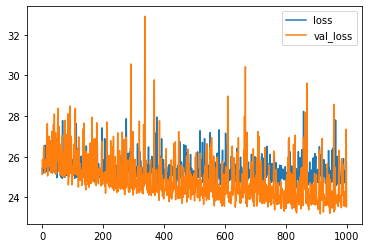

In [28]:
plt.plot(result.epoch, result.history['loss'], label='loss')
plt.plot(result.epoch, result.history['val_loss'], label='val_loss')
# plt.plot(result.epoch, result.history['mae'], label='mae')
# plt.plot(result.epoch, result.history['val_mae'], label='val_mae')
plt.legend(['loss', 'val_loss'])  # 'mae','val_mae'
plt.show()

#### [2-4] 평가
---
- evaluate() 메서드
    * 파라미터 : test_data, test_target
    * 반환값 : loss, compile()의 matrics에서 설정한 항목값

In [24]:
eRet=model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 23.5329 - mae: 3.4938


In [25]:
eRet

[23.532901763916016, 3.493817090988159]

#### [2-5] 예측
---
- predict()

In [27]:
model.predict(X_train[:1])

1/1 [==============================] - 0s 64ms/step


array([[16.778818]], dtype=float32)